## Importing relevant modules

In [3]:
import tempfile
import subprocess
from IPython.display import Image, display

## Utility functions for visualization

In [4]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_pydot(description):
    with tempfile.NamedTemporaryFile(mode="w") as tmp1:
        tmp1.write(description)
        tmp1.flush()
        bashCommand = f"dot -Tpng {tmp1.name}"
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        display(Image(output))

# Trie

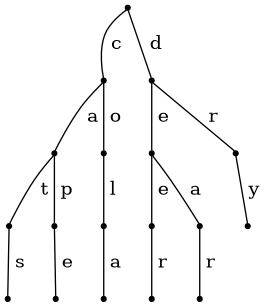

In [171]:
class Trie:
    def __init__(self, words = None):
        self.root = TrieNode("", 0)
        if words:
            self._build(words)
        
    def __contains__(self, word):
        return word in self.root
    
    def _build(self, words):
        for word in words:
            self.root._insert(word)
    
    def insert(self, word):
        self.root._insert(word)
    
    def delete(self, word):
        self.root._delete(word)
    
    def visualize(self):
        self.root.show()
        

class TrieNode:
    counter = 1
    
    def __init__(self, label, depth):
        self.children = {}
        self.label = label
        self.is_word = False
        self.id = TrieNode.counter
        self.depth = depth
        TrieNode.counter += 1
       
    
    def __contains__(self, word):
        node = self
        for i in range(len(word)):
            if word[i] not in node.children:
                return False
            node = node.children[word[i]]
        
        return node.is_word
        
            
    def _insert(self, word, i = 0):
        if i < len(word):
            if word[i] in self.children:
                self.children[word[i]]._insert(word, i + 1)
            else:
                self.children[word[i]] = TrieNode(word[i], i + 1)
                self.children[word[i]]._insert(word, i + 1)
        else:
            self.is_word = True
    
    
    def _delete(self, word, i = 0):
        if self.is_word and len(self.children) == 0 and i == len(word):
            return True
        
        if i >= len(word) or word[i] not in self.children:
            return False
        
        if self.children[word[i]]._delete(word, i + 1):
            if len(self.children) == 1:
                self.children = {}
                return True
            del self.children[word[i]]
            return False
                             
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
        
        
    def dot_edges(self):
        result = []
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {child.label}"];')
        return "\n".join(result)
    
    
    def all_children(self, only_leafs=False):
        if(not only_leafs or not self.children):
            result = [self]
        else:
            result = []
        for child in self.children.values():
            result += child.all_children(only_leafs=only_leafs)
        return result
    
    
    def show(self):
        nodes = self.all_children()
        TrieNode.show_graph(nodes)
    
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        show_pydot(result)
        
        
trie = Trie(["cats", "cape", "cola", "deer", "dear", "dry"])
trie.visualize()

# Suffix Trie

In [558]:
class SuffixTrie:
    word = None
    def __init__(self, word):
        self.root = SuffixTrieNode("", 0)
        SuffixTrie.word = word + "~"
        self._build(SuffixTrie.word)
        
    def _build(self, word):
        for i in range(len(word) - 1):
            self.root._insert(word[i:], i)
    
    def search(self, pattern):
        return self.root._search(pattern)
    
    def visualize(self):
        self.root.show()
        

class SuffixTrieNode:
    counter = 1
    
    def __init__(self, label, depth, index = None):
        self.children = {}
        self.label = label
        self.id = SuffixTrieNode.counter
        self.depth = depth
        self.index = index
        SuffixTrieNode.counter += 1
              
            
    def _insert(self, word, i, j = 0):
        if j < len(word):
            if word[j] in self.children:
                self.children[word[j]]._insert(word, i, j + 1)
            else:
                if j == len(word) - 1:
                    self.children[word[j]] = SuffixTrieNode(word[j], j + 1, i)
                else:
                    self.children[word[j]] = SuffixTrieNode(word[j], j + 1)
                self.children[word[j]]._insert(word, i, j + 1)
                             
    
    def _search(self, pattern, i = 0):
        res = []
        if i >= len(pattern) or SuffixTrie.word[len(SuffixTrie.word) - 1] == pattern[len(pattern) - 1] or pattern[i] not in self.children:
            return []
        
        if i == len(pattern) - 1 and pattern[i] in self.children:
            return self.children[pattern[i]]._get_all_indexes()
        
        res.extend(self.children[pattern[i]]._search(pattern, i + 1))
        return res
        
    
    def _get_all_indexes(self):
        if len(self.children) == 0:
            return [self.index]
        
        indexes = []
        
        for node in self.children.values():
            indexes.extend(node._get_all_indexes())
        
        return indexes
    
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
        
        
    def dot_edges(self):
        result = []
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {child.label}"];')
        return "\n".join(result)
    
    
    def all_children(self, only_leafs=False):
        if(not only_leafs or not self.children):
            result = [self]
        else:
            result = []
        for child in self.children.values():
            result += child.all_children(only_leafs=only_leafs)
        return result
    
    
    def show(self):
        nodes = self.all_children()
        SuffixTrieNode.show_graph(nodes)
    
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        show_pydot(result)

# Suffix Tree

In [546]:
class SuffixTree:
    def __init__(self, word):
        self.root = SuffixTreeNode(None, "", 0)
        self.root.word = word + "~"
        self._build(self.root.word)

    def _build(self, word):
        self.root._insert(word)
    
    def search(self, pattern):
        return self.root._search(pattern)
    
    def visualize(self):
        self.root.show()
        

class SuffixTreeNode:
    counter = 1
    
    def __init__(self, pos, word, depth, index = None):
        self.children = {}
        self.range = pos
        self.word = word
        self.id = SuffixTreeNode.counter
        self.index = index
        self.depth = depth
        SuffixTreeNode.counter += 1
        
    
    def _insert(self, word):
        n = len(word)
        for i in range(n - 2, -1, -1):
            node = self
            if word[i] not in node.children:
                node.children[word[i]] = SuffixTreeNode((i, n), word, node.depth + 1, i)
                continue
            
            
            node = node.children[word[i]]
            j = i + 1
            k = i
            while j < n:
                if j - k >= node.range[1] - node.range[0]:
                    k = j
                    if word[j] in node.children:
                        node = node.children[word[j]]
                    else:
                        node.children[word[k]] = SuffixTreeNode((k, n), word, node.depth + 1, i)
                        break
                    
                if word[j] != word[node.range[0] + j - k]:
                    node.children[word[j]] = SuffixTreeNode((j, n), word, node.depth + 1, i)
                    node.children[word[node.range[0] + j - k]] = SuffixTreeNode((node.range[0] + j - k, n), word, node.depth + 1, node.index)
                    node.index = None
                    node.range = (k, j)
                    break
                
                j += 1
    
    
    def _search(self, pattern, i = 0):
        res = []
        node = self
        if i >= len(pattern) or pattern[len(pattern) - 1] == self.word[len(self.word) - 1] or len(pattern) >= len(self.word) or pattern[i] not in self.children:
            return []
        
        node = node.children[pattern[i]]
        i += 1
        k = 1
        while i < len(pattern):
            if node.range[0] + k >= node.range[1]:
                res.extend(node._search(pattern, i))
                return res
            
            if pattern[i] != node.word[node.range[0] + k]:
                return []
            
            i += 1
            k += 1
        
        return node._get_leaves_indexes(pattern)
    
    
    def _get_leaves_indexes(self, pattern):
        indexes = []
        if len(self.children) == 0:
            return [self.index]
        
        for node in self.children.values():
            indexes.extend(node._get_leaves_indexes(pattern))
        
        return indexes
    
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
        
        
    def dot_edges(self):
        result = []
        x = "~"
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label="{child.word[child.range[0]:child.range[1]]}"];')
        return "\n".join(result)
    
    
    def all_children(self, only_leafs=False):
        if(not only_leafs or not self.children):
            result = [self]
        else:
            result = []
        for child in self.children.values():
            result += child.all_children(only_leafs=only_leafs)
        return result
    
    
    def show(self):
        nodes = self.all_children()
        SuffixTreeNode.show_graph(nodes)
    
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        show_pydot(result)

## Naive string matching function for testing searching in Suffix Trie and Suffix Tree

In [307]:
def naive_string_matching(text, pattern):
    res = []
    for s in range(len(text) - len(pattern) + 1):
        if pattern == text[s : s + len(pattern)]:
            res.append(s)
    
    return res

## Testing if Suffix Trie and Suffix Tree correctly find all matchings for given pattern

Searching functions assume that '\~' doesn't occur in the text. In order for searching functions to search correctly provide the text without '\~' character.

String: "havanabananas", pattern: "na"

Naive string matching: [4, 8, 10]
Suffix Trie matching: [4, 8, 10]
Suffix Tree matching: [4, 8, 10]


			Suffix Trie


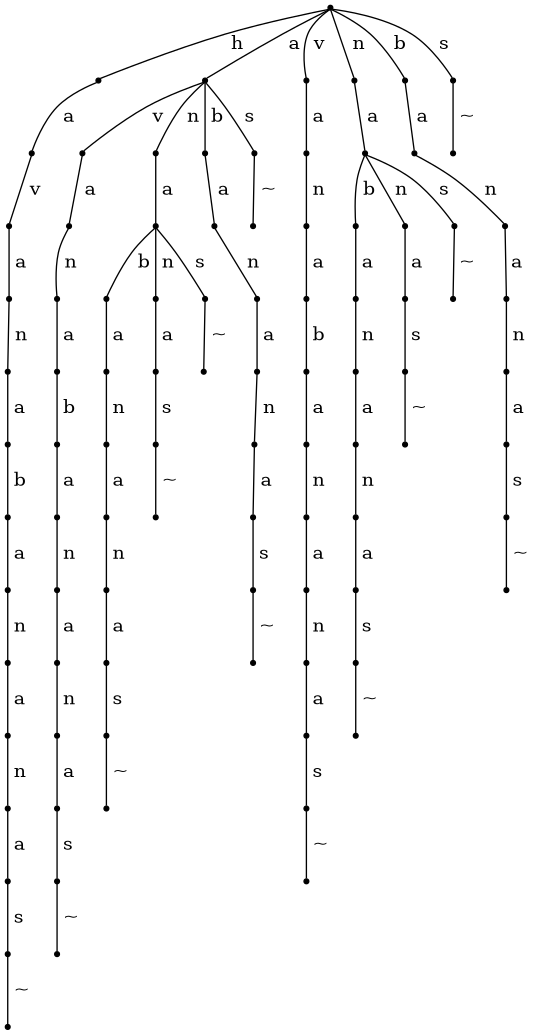

			Suffix Tree


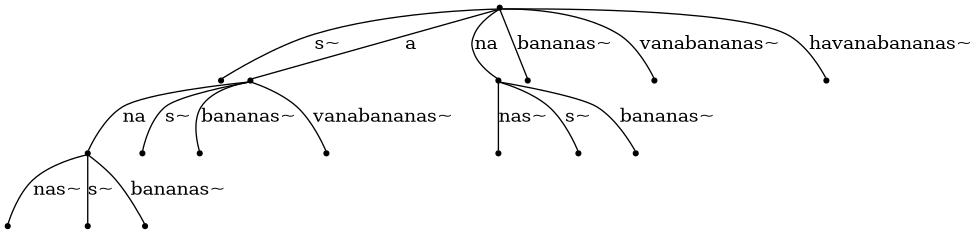

In [570]:
text, pattern = "havanabananas", "na" 
print(f"String: \"{text}\", pattern: \"{pattern}\"\n")

print("Naive string matching:", naive_string_matching(text, pattern))

suffix_trie = SuffixTrie(text)
print("Suffix Trie matching:", sorted(suffix_trie.search(pattern)))


suffix_tree = SuffixTree(text)
print("Suffix Tree matching:", sorted(suffix_tree.search(pattern)))

print("\n\n\t\t\tSuffix Trie")
suffix_trie.visualize()
print("\t\t\tSuffix Tree")
suffix_tree.visualize()

## Testing performance of building Suffix Trie and Suffix Tree

						Test #1


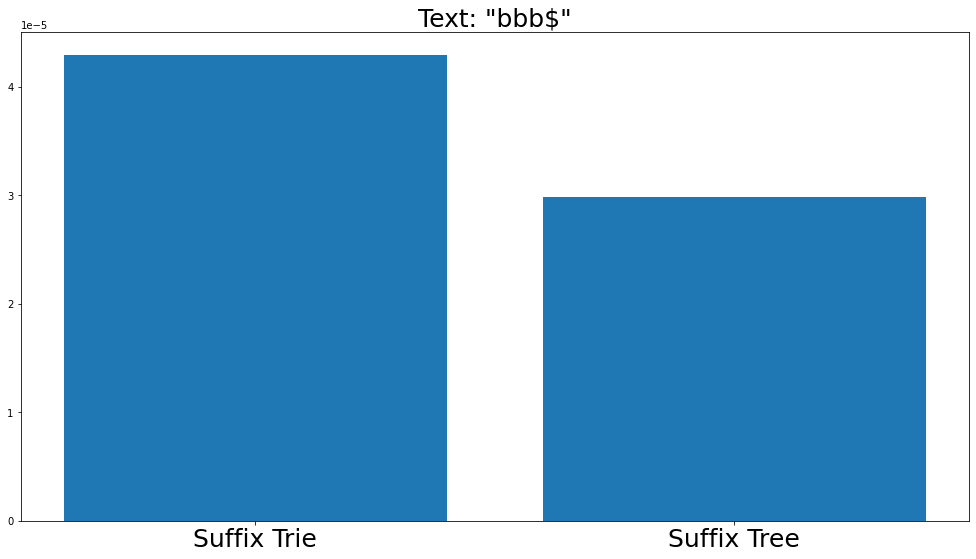

				Suffix Trie build time: 4.29e-05 seconds
				Suffix Tree build time: 2.98e-05 seconds
		---------------------------------------------------------------------------------------------



						Test #2


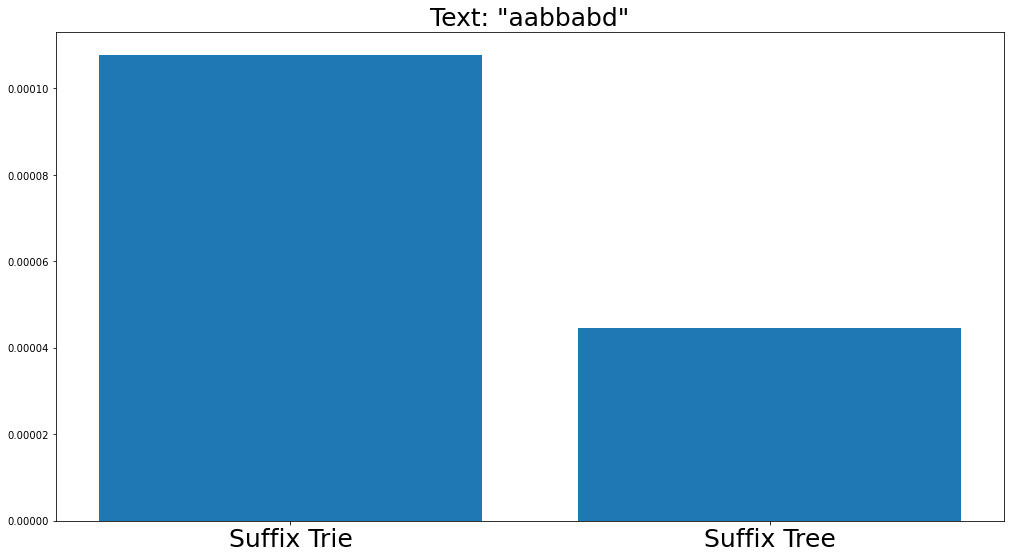

				Suffix Trie build time: 0.000108 seconds
				Suffix Tree build time: 4.46e-05 seconds
		---------------------------------------------------------------------------------------------



						Test #3


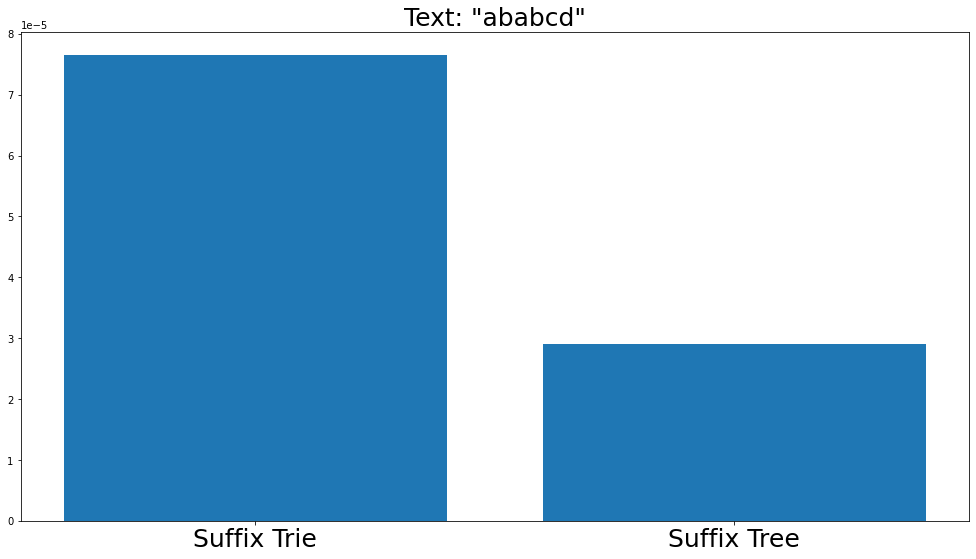

				Suffix Trie build time: 7.65e-05 seconds
				Suffix Tree build time: 2.91e-05 seconds
		---------------------------------------------------------------------------------------------



						Test #4


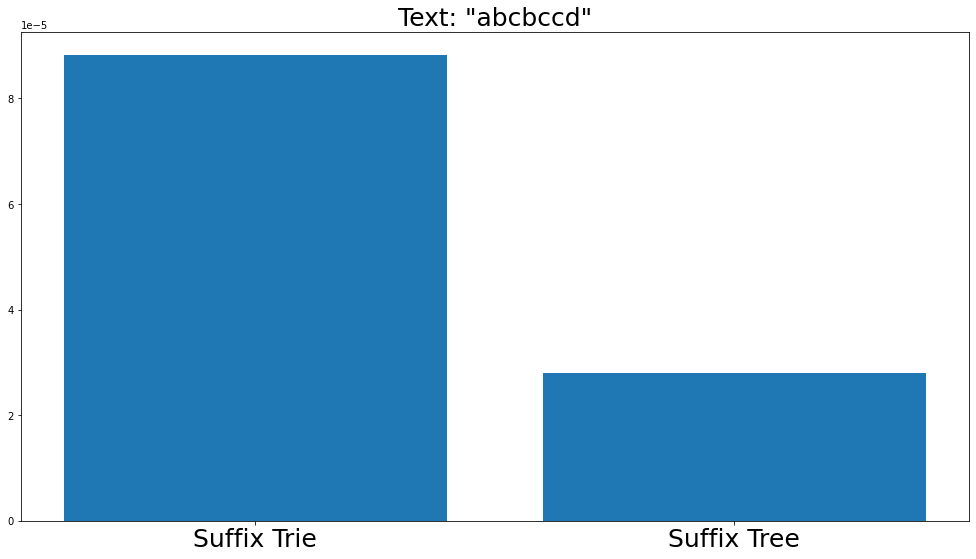

				Suffix Trie build time: 8.82e-05 seconds
				Suffix Tree build time: 2.79e-05 seconds
		---------------------------------------------------------------------------------------------



						Test #5


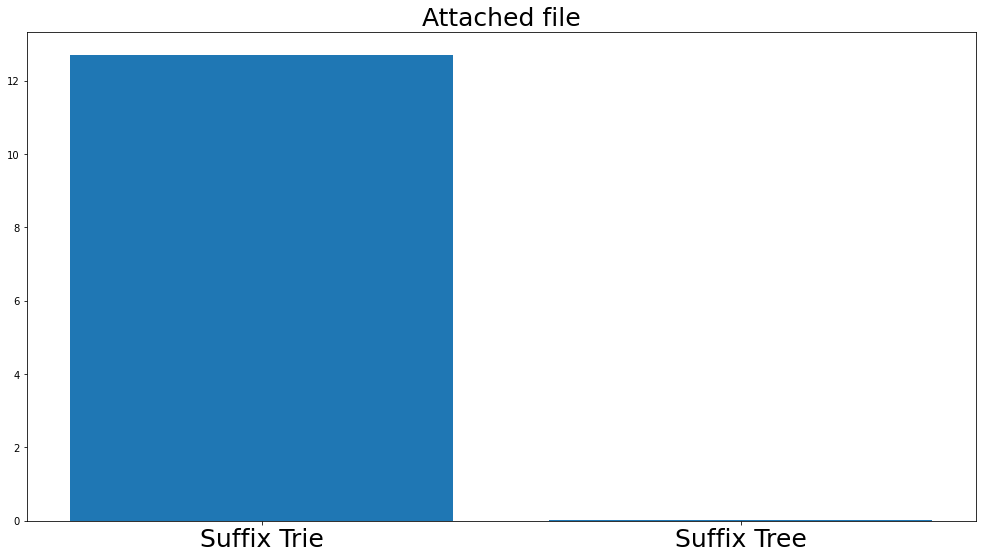

				Suffix Trie build time: 12.7 seconds
				Suffix Tree build time: 0.0285 seconds
		---------------------------------------------------------------------------------------------





In [659]:
from time import time
import matplotlib.pyplot as plt
import numpy as np

texts = ["bbb$", "aabbabd", "ababcd", "abcbccd"]

with open("1997_714_head.txt", "r") as file:
    texts.append(file.read())
    
def check_build_time(Tree, text, temp):
    t = time()
    tree = Tree(text)
    temp.append(time() - t)


objects = ("Suffix Trie", "Suffix Tree")
y_pos = np.arange(len(objects))
for i, text in enumerate(texts):
    print(f"\t\t\t\t\t\tTest #{i + 1}")
    temp = []
    check_build_time(SuffixTrie, text, temp)
    check_build_time(SuffixTree, text, temp)
    plt.figure(figsize = (17, 9))
    plt.bar(y_pos, temp, align='center')
    plt.xticks(y_pos, objects, fontsize = 25)
    if i == len(texts) - 1:
        plt.title("Attached file", fontsize = 25)
    else:
        plt.title("Text: \"" + text + "\"", fontsize = 25)
    plt.show()
    print(f"\t\t\t\tSuffix Trie build time: {format(temp[0], '.3g')} seconds")
    print(f"\t\t\t\tSuffix Tree build time: {format(temp[1], '.3g')} seconds")
    print("\t\t---------------------------------------------------------------------------------------------\n\n\n")